# Establish CAPEX estimation relationship for a feedstock shredder/primary grinder

In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from config import settings
from functions.general.utility import get_project_root
from functions.TEA import convert_currency_annual_average
from functions.TEA.scaling import CEPCI_scale
from functions.general.curve_fitting import display_curve_fits, func_straight_line, func_power_curve


### Load data and do some data wrangling

In [3]:
# General parameters
root_dir = get_project_root()
updated_currency = "GBP"
updated_CEPCI_year = 2020
plot_style = settings.plotting.digital
# Load and display data
data_file = "CAPEX_grinder_shredder.csv"
data_file_path = os.path.join(root_dir, "data", data_file)
df_source = pd.read_csv(data_file_path)
df = df_source.copy()  # working copy of original dataframe
df

,Process Reference,CAPEX,Currency,Plant size [tonnes/hour],Plant size [tonnes/year],Reference Year,Country,Comments,Reference,Reference Label,doi,Ignore
0,Primary grinder,20754.71698,USD,0.95,6846,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,NaN
1,Primary grinder,22641.50943,USD,0.98,7047,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,NaN
2,Primary grinder,28301.88679,USD,4.17,30000,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,NaN
3,Primary grinder,39622.64151,USD,4.14,29799,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,NaN
4,Primary grinder,37735.84906,USD,8.31,59799,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,NaN
5,Primary grinder,60377.35849,USD,8.33,60000,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,NaN
6,Primary grinder,664150.94340,USD,11.66,83960,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,True
7,Primary grinder,664150.94340,USD,3.30,23758,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,True


In [4]:
# Convert all values to same currency and update to most recent CEPCI value
CAPEX_currency_scaled = []
CAPEX_currency_CEPCI_scaled = []

for row_no in df.index:
    CAPEX_currency_scaled.append(
        convert_currency_annual_average(value=df["CAPEX"][row_no], year=df["Reference Year"][row_no],
                                        base_currency=df["Currency"][row_no], converted_currency=updated_currency, 
                                        approximate_rate=True, method="yfinance"))
    CAPEX_currency_CEPCI_scaled.append(
        CEPCI_scale(base_year=df["Reference Year"][row_no], design_year=updated_CEPCI_year,
                    value=CAPEX_currency_scaled[row_no]))

# Add (i) currency and (ii) currency + CEPCI scaled values to dataframe
currency_scaled_label = "CAPEX_" + updated_currency
currency_and_CEPCI_scaled_label = "CAPEX_" + updated_currency + "_CEPCI_" + str(updated_CEPCI_year)

df[currency_scaled_label] = CAPEX_currency_scaled
df[currency_and_CEPCI_scaled_label] = CAPEX_currency_CEPCI_scaled

# Also add to original dataframe
df_source[currency_scaled_label] = CAPEX_currency_scaled
df_source[currency_and_CEPCI_scaled_label] = CAPEX_currency_CEPCI_scaled

df

,Process Reference,CAPEX,Currency,Plant size [tonnes/hour],Plant size [tonnes/year],Reference Year,Country,Comments,Reference,Reference Label,doi,Ignore,CAPEX_GBP,CAPEX_GBP_CEPCI_2020
0,Primary grinder,20754.71698,USD,0.95,6846,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,NaN,11332.650896,11767.916076
1,Primary grinder,22641.50943,USD,0.98,7047,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,NaN,12362.891885,12837.726627
2,Primary grinder,28301.88679,USD,4.17,30000,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,NaN,15453.614857,16047.158285
3,Primary grinder,39622.64151,USD,4.14,29799,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,NaN,21635.060802,22466.021601
4,Primary grinder,37735.84906,USD,8.31,59799,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,NaN,20604.819813,21396.211050
5,Primary grinder,60377.35849,USD,8.33,60000,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,NaN,32967.711698,34233.937677
6,Primary grinder,664150.94340,USD,11.66,83960,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,True,362644.828681,376573.314454
7,Primary grinder,664150.94340,USD,3.30,23758,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,True,362644.828681,376573.314454


In [5]:
# Discard outlier
df = df[df["Ignore"]!= True].copy()


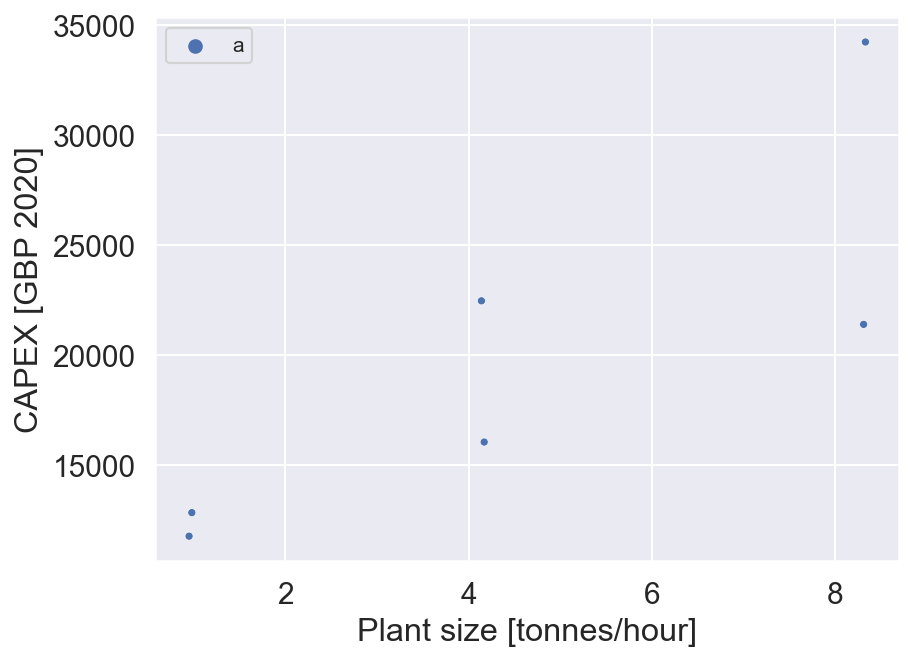

In [6]:
sns.set(font_scale=1.3)
fig, ax = plt.subplots(figsize=tuple(plot_style.fig_size), dpi=150)
sns.scatterplot(data=df, x="Plant size [tonnes/hour]", y="CAPEX_GBP_CEPCI_2020", hue="Reference Label", s=15)
ax.set_ylabel("CAPEX [GBP 2020]")
plt.legend(loc='upper left', fontsize=10)
plt.show()

Straight line fit: R2: 0.700; RMSE: 4152; MAPE: 15 %
Power curve fit: R2: 0.700; RMSE: 4151; MAPE: 15 %
2nd degree polynomial fit: R2: 0.700; RMSE: 4151; MAPE: 15 %
3rd degree polynomial: R2: 0.875; RMSE: 2685; MAPE: 15 %


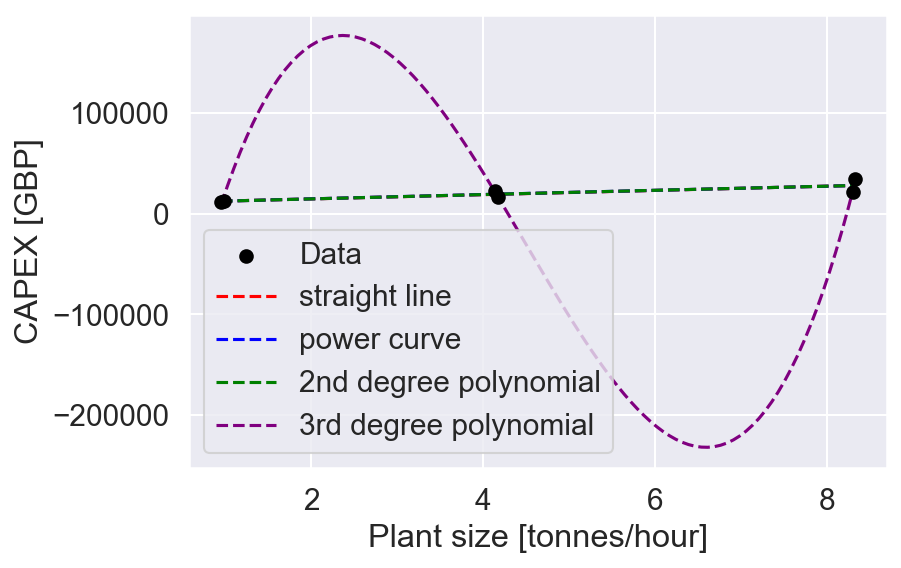

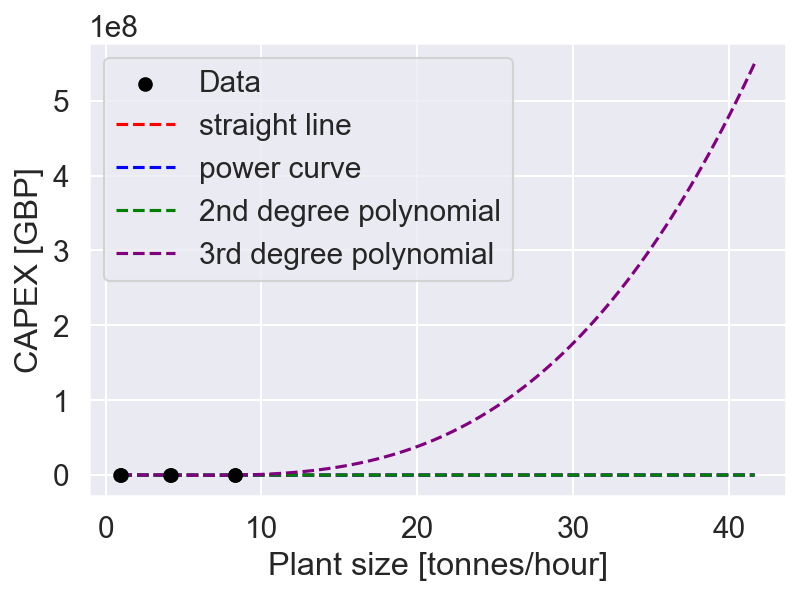

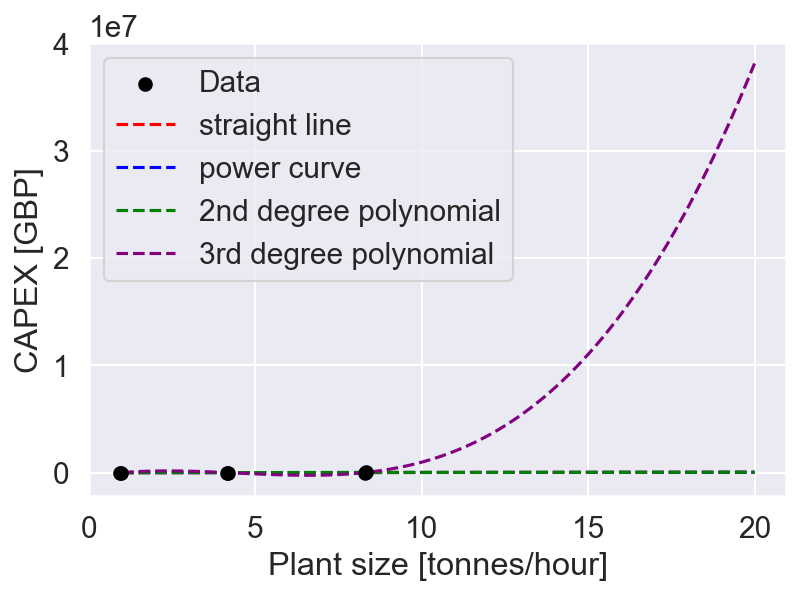

{'straight_line': {'Constants': array([ 2107.22048657, 10351.14745464]),
  'R2': 0.7002119797381805,
  'RMSE': 4152.236172723162},
 'power_curve': {'Constants': array([2.40863006e+03, 9.45246683e-01, 9.98123800e+03]),
  'R2': 0.7003617167565277,
  'RMSE': 4151.1990713750765},
 '2nd_degree_polynomial': {'Constants': array([ 2230.67595462,   -13.07285054, 10179.00189679]),
  'R2': 0.7003278876398297,
  'RMSE': 4151.433399633894},
 '3rd_degree_polynomial': {'Constants': array([ 506059.71690407, -145303.78414965,   10810.45640965,
         -350392.62292297]),
  'R2': 0.8746880352384057,
  'RMSE': 2684.5480403323704},
 'data_range': {'min': 0.95, 'max': 8.33}}

In [7]:
display_curve_fits(dataframe=df, x_data_label="Plant size [tonnes/hour]", y_data_label="CAPEX_GBP_CEPCI_2020", plot_y_label="CAPEX [GBP]", plot_custom_x_range=[1, 20])


- Linear fit most suitable.

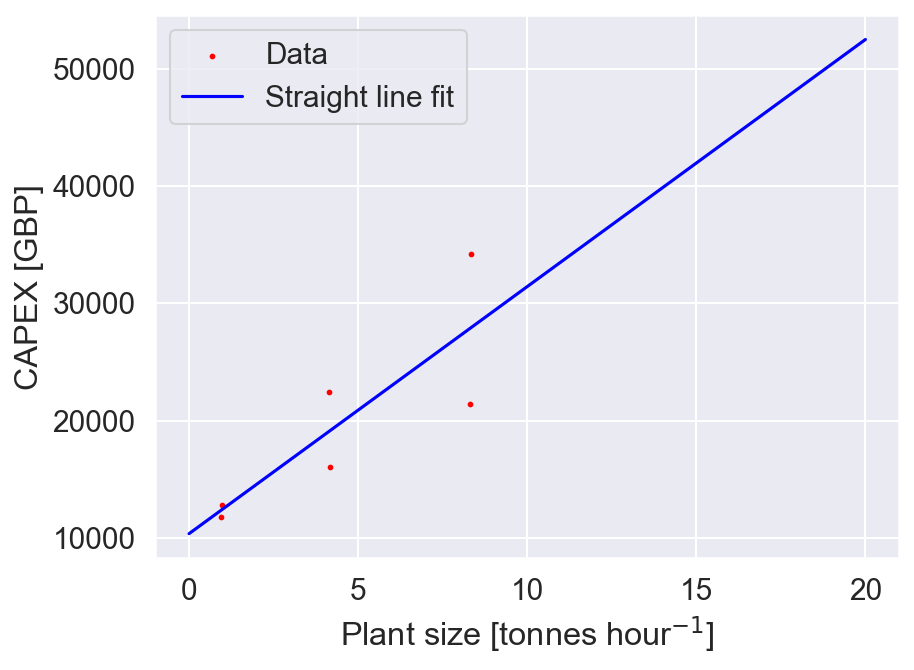

In [8]:
# Display data and fits in same plot
x_array =np.linspace(start=0, stop=20, num=100)

fig, ax = plt.subplots(figsize=tuple(plot_style.fig_size), dpi=150)
ax.scatter(df["Plant size [tonnes/hour]"], df["CAPEX_GBP_CEPCI_2020"], label="Data", color="red", s=3)
ax.plot(x_array, func_straight_line(x_array, *[2107.22048657, 10351.14745464]), label="Straight line fit", color="blue")
ax.set_xlabel("Plant size [tonnes hour$^{-1}$]")
ax.set_ylabel("CAPEX [GBP]")
plt.legend()
plt.show()


# Conclusions
- Little data available. 
- Good fit achieved.
- Outliers had to be removed prior to modelling.